<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_48_K_Nearest_Neighbour_(Practical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score

# Importing the dataset

Training Dataset: https://drive.google.com/file/d/11U_ktltMYdhq1lH6p7Vil1qZ5Ovis3U4/view?usp=sharing

Testing Dataset: https://drive.google.com/file/d/1OjdGuxV_pb0Gu5KHnfuocWmNRs6x_OTM/view?usp=sharing

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/mobile_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/mobile_test.csv')

# EDA - DE, DM, DC, DV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
train_df.shape

(2000, 21)

In [7]:
test_df.shape

(1000, 21)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
train_df.isna().sum().sum()

0

In [11]:
train_df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [12]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
train_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

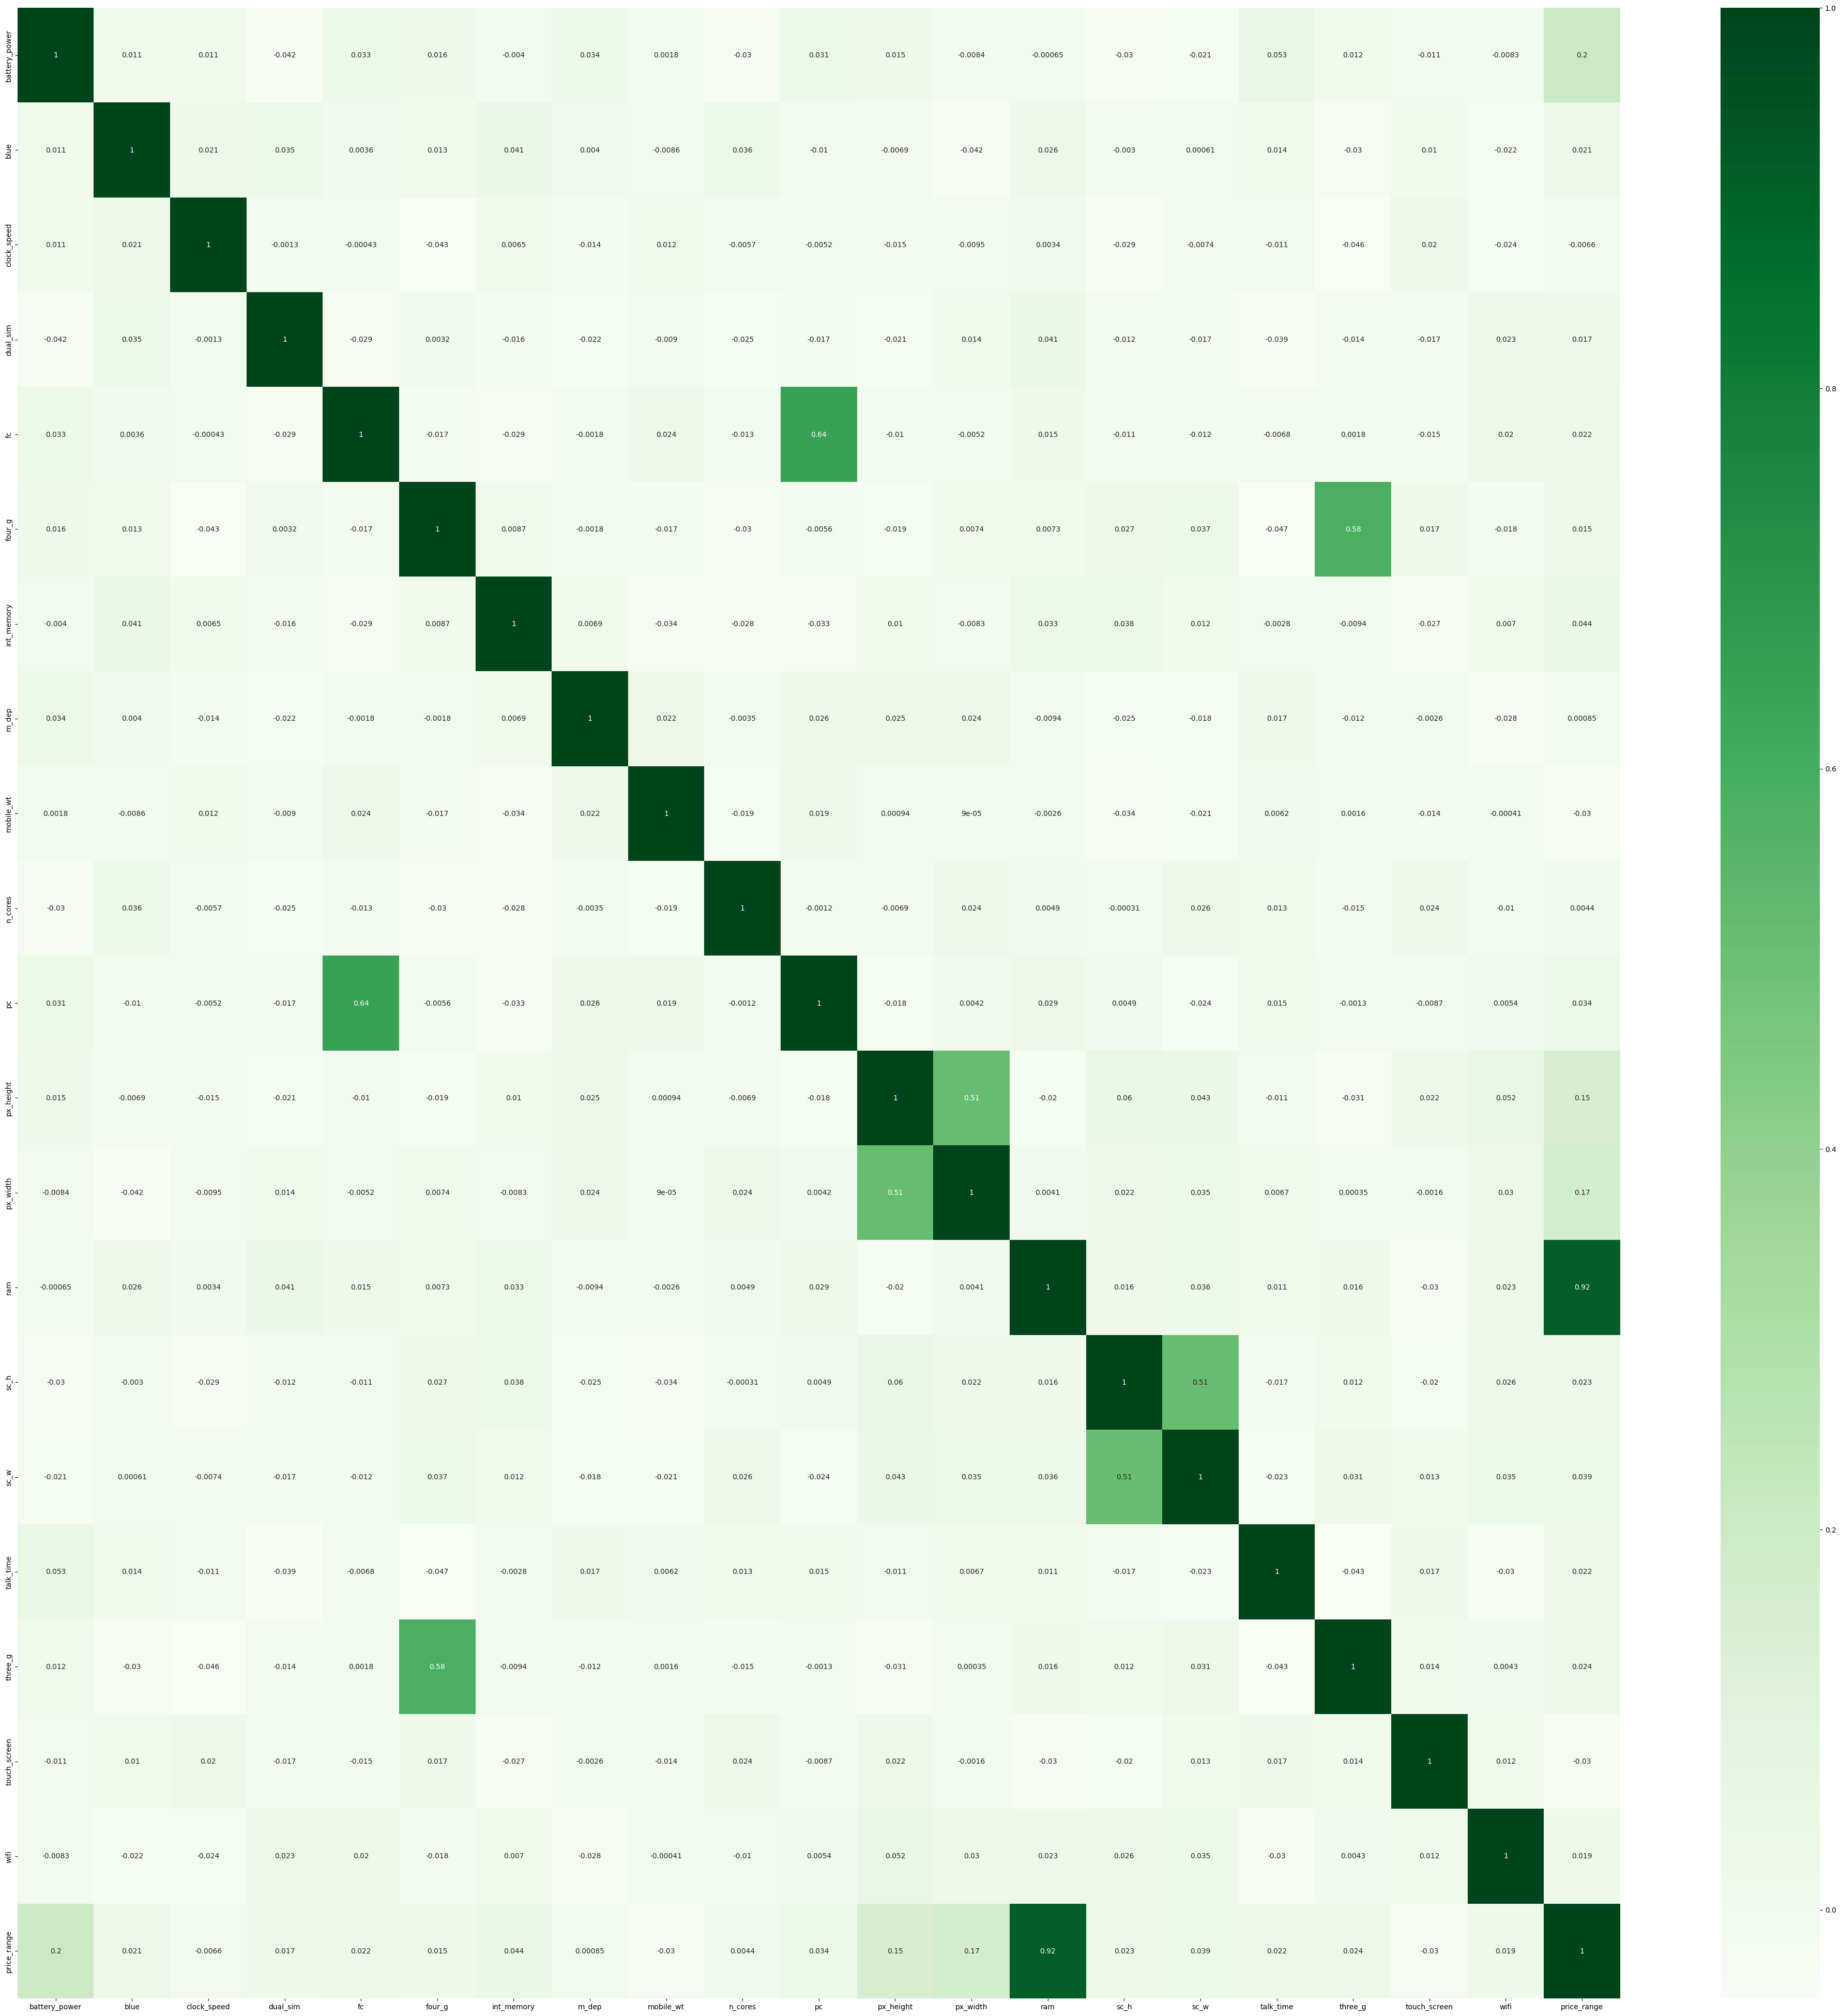

In [14]:
plt.figure(figsize=(50, 50))
sns.heatmap(train_df.corr(), annot=True, cmap='Greens')

In [15]:
# Feature Selection
X = train_df.drop('price_range', axis=1)
y = train_df.price_range

In [16]:
model = ExtraTreesClassifier()

In [17]:
model.fit(X,y)

ExtraTreesClassifier()

In [18]:
model.feature_importances_

array([0.06238064, 0.01960097, 0.03357802, 0.01946628, 0.03317881,
       0.01765529, 0.03506542, 0.03494764, 0.03529871, 0.03334473,
       0.03431935, 0.04687944, 0.04859308, 0.38908523, 0.03353369,
       0.03443355, 0.03545233, 0.01503527, 0.01798726, 0.02016428])

In [19]:
important_features = pd.Series(model.feature_importances_, index=X.columns)

In [20]:
important_features

battery_power    0.062381
blue             0.019601
clock_speed      0.033578
dual_sim         0.019466
fc               0.033179
four_g           0.017655
int_memory       0.035065
m_dep            0.034948
mobile_wt        0.035299
n_cores          0.033345
pc               0.034319
px_height        0.046879
px_width         0.048593
ram              0.389085
sc_h             0.033534
sc_w             0.034434
talk_time        0.035452
three_g          0.015035
touch_screen     0.017987
wifi             0.020164
dtype: float64

<Axes: >

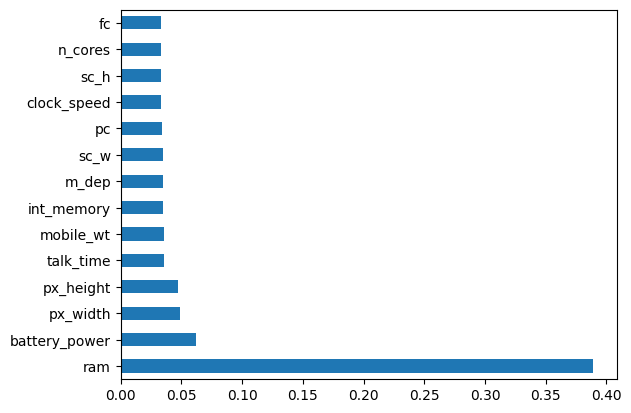

In [21]:
important_features.nlargest(14).plot(kind='barh')

In [22]:
new_X = train_df[list(important_features.nlargest(14).index)]

In [23]:
new_X

,ram,battery_power,px_width,px_height,talk_time,mobile_wt,int_memory,m_dep,sc_w,pc,clock_speed,sc_h,n_cores,fc
0,2549,842,756,20,19,188,7,0.6,7,2,2.2,9,2,1
1,2631,1021,1988,905,7,136,53,0.7,3,6,0.5,17,3,0
2,2603,563,1716,1263,9,145,41,0.9,2,6,0.5,11,5,2
3,2769,615,1786,1216,11,131,10,0.8,8,9,2.5,16,6,0
4,1411,1821,1212,1208,15,141,44,0.6,2,14,1.2,8,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,19,106,2,0.8,4,14,0.5,13,6,0
1996,2032,1965,1965,915,16,187,39,0.2,10,3,2.6,11,4,0
1997,3057,1911,1632,868,5,108,36,0.7,1,3,0.9,9,8,1
1998,869,1512,670,336,19,145,46,0.1,10,5,0.9,18,5,4


In [24]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.15, random_state=0)

In [25]:
len(X_train)

1700

In [26]:
len(X_test)

300

In [27]:
KNN_Model = KNeighborsClassifier()
LR_Model = LogisticRegression()
DT_Model = DecisionTreeClassifier()
RF_Model = RandomForestClassifier()

In [28]:
KNN_Model.fit(X_train, y_train)
LR_Model.fit(X_train, y_train)
DT_Model.fit(X_train, y_train)
RF_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [29]:
KNN_y_pred = KNN_Model.predict(X_test)
LR_y_pred = LR_Model.predict(X_test)
DT_y_pred = DT_Model.predict(X_test)
RF_y_pred = RF_Model.predict(X_test)

In [30]:
final_df = pd.DataFrame({"Actual": y_test,
                         "KNN": KNN_y_pred,
                         "LR": LR_y_pred,
                         "DT": DT_y_pred,
                         "RF": RF_y_pred})

In [31]:
final_df

,Actual,KNN,LR,DT,RF
405,3,3,3,3,3
1190,0,0,0,0,0
1132,2,2,2,2,2
731,2,2,1,2,1
1754,2,2,3,2,3
...,...,...,...,...,...
575,2,2,2,2,2
982,3,3,3,3,3
723,0,0,0,0,0
1487,2,2,1,2,2


In [32]:
confusion_matrix(y_test, KNN_y_pred)

array([[66,  3,  0,  0],
       [ 2, 62,  2,  0],
       [ 0,  3, 62,  9],
       [ 0,  0,  3, 88]])

In [33]:
# (79+68+60+77)/300 = 0.95 = 95%

In [34]:
confusion_matrix(y_test, LR_y_pred)

array([[61,  8,  0,  0],
       [14, 31, 17,  4],
       [ 0, 21, 29, 24],
       [ 0,  1, 28, 62]])

In [35]:
# (62+41+33+65)/300 = 0.67 = 67%

In [36]:
confusion_matrix(y_test, DT_y_pred)

array([[65,  4,  0,  0],
       [ 5, 50, 11,  0],
       [ 0,  7, 56, 11],
       [ 0,  0, 11, 80]])

In [37]:
# (73+62+45+73)/300 = 0.84 = 84%

In [38]:
confusion_matrix(y_test, RF_y_pred)

array([[68,  1,  0,  0],
       [ 4, 54,  8,  0],
       [ 0,  9, 60,  5],
       [ 0,  0,  8, 83]])

In [39]:
# (76+65+55+75)/300 = 0.90 = 90%

In [40]:
arr = [i for i in range(1,50) if i%2!=0]

for i in arr:
  new_model = KNeighborsClassifier(n_neighbors=i)
  new_model.fit(X_train,y_train)
  pred = new_model.predict(X_test)
  print(f'K={i} -> Accuracy is {accuracy_score(y_test, pred)}')


K=1 -> Accuracy is 0.91
K=3 -> Accuracy is 0.9366666666666666
K=5 -> Accuracy is 0.9266666666666666
K=7 -> Accuracy is 0.9433333333333334
K=9 -> Accuracy is 0.9466666666666667
K=11 -> Accuracy is 0.9433333333333334
K=13 -> Accuracy is 0.96
K=15 -> Accuracy is 0.96
K=17 -> Accuracy is 0.9633333333333334
K=19 -> Accuracy is 0.9533333333333334
K=21 -> Accuracy is 0.9533333333333334
K=23 -> Accuracy is 0.9533333333333334
K=25 -> Accuracy is 0.9466666666666667
K=27 -> Accuracy is 0.94
K=29 -> Accuracy is 0.9433333333333334
K=31 -> Accuracy is 0.94
K=33 -> Accuracy is 0.9466666666666667
K=35 -> Accuracy is 0.9433333333333334
K=37 -> Accuracy is 0.94
K=39 -> Accuracy is 0.9333333333333333
K=41 -> Accuracy is 0.9366666666666666
K=43 -> Accuracy is 0.93
K=45 -> Accuracy is 0.9266666666666666
K=47 -> Accuracy is 0.93
K=49 -> Accuracy is 0.9333333333333333


In [41]:
accuracy_score(y_test, KNN_y_pred)

0.9266666666666666

In [42]:
scores = cross_val_score(KNN_Model, new_X, y, cv=10)

In [43]:
scores

array([0.9  , 0.94 , 0.92 , 0.935, 0.925, 0.95 , 0.915, 0.915, 0.915,
       0.92 ])

In [44]:
scores.mean()

0.9235000000000001

In [45]:
scores_k = cross_val_score(KNeighborsClassifier(n_neighbors=7), new_X, y, cv=10)

In [46]:
scores_k.mean()

0.9265000000000001

In [47]:
# Task -> Stratified K-Fold